In [381]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [382]:
urban_population = pd.read_csv('C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\share-of-population-urban.csv')

In [383]:
income_taxes = pd.read_csv("C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\taxes-on-incomes-of-individuals-and-corporations-gdp.csv")

In [384]:
urban_population.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population'], dtype='object')

In [385]:
income_taxes.columns

Index(['Entity', 'Code', 'Year', 'Tax_Percent_GDP'], dtype='object')

In [386]:
urban_population.describe()

,Year
count,15072.000000
mean,1988.545382
std,16.737532
min,1960.000000
25%,1974.000000
50%,1989.000000
75%,2003.000000
max,2017.000000


In [387]:
income_taxes.describe()

,Year,Tax_Percent_GDP
count,4871.000000,4871.000000
mean,2000.872716,6.538407
std,9.803376,4.915040
min,1980.000000,0.000000
25%,1994.000000,2.903660
50%,2001.000000,5.455395
75%,2009.000000,8.992646
max,2017.000000,32.075305


In [388]:
urban_population.head()

,Entity,Code,Year,Urban_Population
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [389]:
income_taxes.head()

,Entity,Code,Year,Tax_Percent_GDP
0,Afghanistan,AFG,2003,0.165953
1,Afghanistan,AFG,2004,0.411647
2,Afghanistan,AFG,2005,0.320864
3,Afghanistan,AFG,2006,1.261181
4,Afghanistan,AFG,2007,1.323461


In [390]:
# Entity feature may need cleaning . . . Merging the data sets with inner join will drop these observations
urban_population[['Entity', 'Urban_Population']].groupby('Entity').count().head()

,Urban_Population
Entity,
43hj43,1
43hu,1
Afghanistan,56
Albania,57
Algeria,58


In [391]:
urban_population['Entity'].unique()

array(['Afghanistan', 'x', 'Albania', 'sjke', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'rehojher', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'shrjehr', 'Austria', 'Azerbaijan', 'Bahamas', 'rreji43',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', '43hj43',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'herger', 'Bosnia and Herzegovina', 'Botswana', 'ho4u3h', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', '43hu', 'Cameroon', 'Canada', 'Cape Verde',
       'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Domini

In [392]:
urban_population[['Code', 'Urban_Population']].groupby('Code').count().head()

,Urban_Population
Code,
ABW,58
AFG,58
AGO,58
ALB,58
AND,58


In [393]:
urban_population[['Year', 'Urban_Population']].groupby('Year').count().head()

,Urban_Population
Year,
1960,259
1961,259
1962,259
1963,259
1964,259


In [394]:
income_taxes[['Code', 'Tax_Percent_GDP']].groupby('Code').count().head()

,Tax_Percent_GDP
Code,
ABW,25
AFG,15
AGO,15
AIA,15
ALB,21


In [395]:
income_taxes[['Entity', 'Tax_Percent_GDP']].groupby('Entity').count().head()

,Tax_Percent_GDP
Entity,
Afghanistan,15
Albania,21
Algeria,2
Angola,15
Anguilla,15


#### Merge the two datasets such that the resultant dataset contains only the intersection of the rows present in both files.

In [396]:
merged = pd.merge(urban_population, income_taxes, how='inner', on=['Entity', 'Code', 'Year'])

In [397]:
merged.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population', 'Tax_Percent_GDP'], dtype='object')

In [398]:
merged.describe()

,Year,Tax_Percent_GDP
count,4822.000000,4822.000000
mean,2000.815844,6.541968
std,9.825130,4.914286
min,1980.000000,0.000000
25%,1994.000000,2.913589
50%,2001.000000,5.453532
75%,2009.000000,8.964636
max,2017.000000,32.075305


In [399]:
merged['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'I

In [400]:
merged['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'CHL', 'CHN', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'FJI', 'FIN', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBY', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG',
       'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC',
       'NER', 'NGA', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG',
       'PRY', 'PER',

In [401]:
merged['Year'].unique()

array([2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 1992, 1993, 1997, 1998, 1999, 2000, 2001, 2002,
       1994, 1995, 1996, 2005, 1990, 1991, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989], dtype=int64)

#### Export the results to a new file called merged_social_data.csv.

In [402]:
merged.to_csv('merged_social_data.csv')

# Clean Data

In [403]:
merged.iloc[38]

Entity              Angola
Code                   AGO
Year                  1994
Urban_Population       43%
Tax_Percent_GDP       18.8
Name: 38, dtype: object

In [404]:
merged['Urban_Population'] = merged['Urban_Population'].apply(lambda x: x.strip('%'))

In [405]:
merged.iloc[38]

Entity              Angola
Code                   AGO
Year                  1994
Urban_Population        43
Tax_Percent_GDP       18.8
Name: 38, dtype: object

# Create Dummy Variables

In [406]:
merged['Year_Code'] = 0
merged['Year_Code'] = merged['Year'].astype(str) + "_" + merged['Code'].astype(str)

In [407]:
obj_cols = ['Year', 'Code', 'Year_Code']
label_encoder = LabelEncoder()
for col in obj_cols:
    try:
        merged[col+"_dummy"] = label_encoder.fit_transform(merged[col])
    except:
        print('problem with' + col)

In [408]:
merged['Urban_Population'] = merged['Urban_Population'].astype('float64')

# Exploratory Analysis

In [409]:
merged.dtypes

Entity               object
Code                 object
Year                  int64
Urban_Population    float64
Tax_Percent_GDP     float64
Year_Code            object
Year_dummy            int64
Code_dummy            int32
Year_Code_dummy       int32
dtype: object

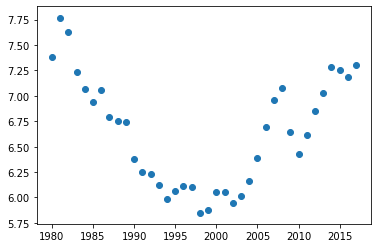

In [410]:
scatter = merged[['Year','Tax_Percent_GDP']].groupby('Year').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

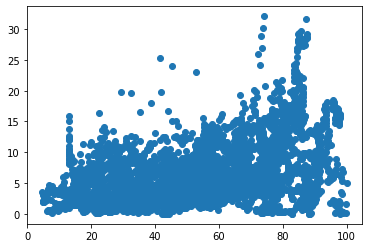

In [411]:
scatter = merged[['Urban_Population','Tax_Percent_GDP']].groupby('Urban_Population').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

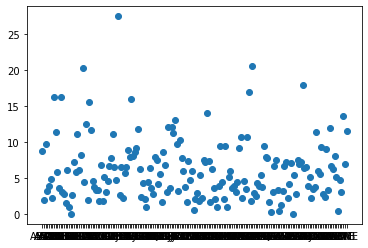

In [412]:
scatter = merged[['Code','Tax_Percent_GDP']].groupby('Code').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

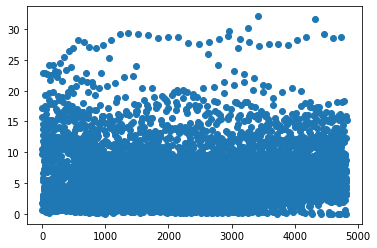

In [413]:
scatter = merged[['Year_Code_dummy','Tax_Percent_GDP']].groupby('Year_Code_dummy').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

# OLS Regression
#### Using the merged results, generate an ordinary least squares regression showing the effect of the independent variable Urban_Population on the dependent variable Tax_Percent_GDP.

#### a. The R squared of the results: .189
#### b. The t-statistic and p-value of the coefficient and intercept: 
<p> The coefficient on Urban_Population has a tstatistic of 33.507 and a p-value of 0.000. <br>
The coefficient on the intercept has a tstatistic of 10.797 and a p-value of 0.000. <br>
The model has 1 degrees of freedom equal to the number of independent vari
    c. Degrees of freedom: 1 (Number of Independent Variables) <br>
 d. The spread of the residuals: -10.422492141267965 - 23.787454001985385 <br>
</p>

In [414]:
result = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population', data=merged).fit()

In [415]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          1.84e-221
Time:                        16:55:32   Log-Likelihood:                -14014.
No. Observations:                4822   AIC:                         2.803e+04
Df Residuals:                    4820   BIC:                         2.805e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7040      0.158     10.797      0.000       1.395       2.013
Urban_Population     0.0887      0.003     33.507      0.000       0.083       0.094
==============================================================================
Omnibus:                      888.992   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.536
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                       5.580   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
influence = OLSInfluence(result)
print(influence.resid.min() , "-" , influence.resid.max())

-10.365364701511133 - 23.647329588254635


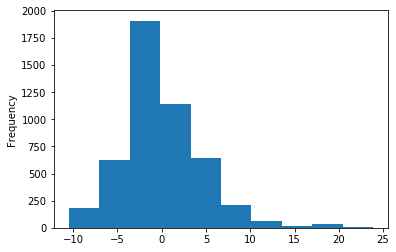

In [348]:
influence.resid.plot.hist()

#### Summarize your results (in the file you made above or a separate document) based on the output of the model. Be sure to describe the relationship between the independent and dependent variable and your interpretation of its significance.

##### Answer the free-form analysis questions below. Note that there are not inherently right or wrong answers; the questions are meant for you to showcase your ability to interpret and understand data:
######    a. What were some challenges you encountered in generating the dataset for analysis, if any?
######    b. Based on this initial model, what steps might you take next to validate or extend your analysis, if any?
######    c. If you were asked to study this relationship, how would you convey your findings?

In [360]:
result = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population + Year_dummy + Code_dummy + Year_Code_dummy', data=merged).fit()

In [361]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          2.67e-223
Time:                        16:36:32   Log-Likelihood:                -14000.
No. Observations:                4822   AIC:                         2.801e+04
Df Residuals:                    4817   BIC:                         2.804e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3732      0.349      9.659      0.000       2.689       4.058
Urban_Population     0.0879      0.003     32.867      0.000       0.083       0.093
Year_dummy          -0.2851      0.060     -4.743      0.000      -0.403      -0.167
Code_dummy          -0.0039      0.001     -3.038      0.002      -0.006      -0.001
Year_Code_dummy      0.0019      0.000      4.547      0.000       0.001       0.003
==============================================================================
Omnibus:                      870.149   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2121.908
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       5.555   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

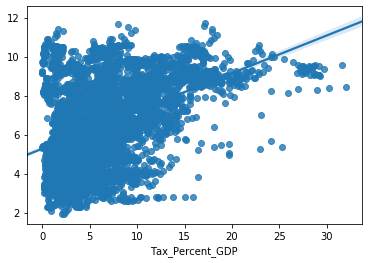

In [362]:
sns.regplot(merged['Tax_Percent_GDP'], result.predict(merged[['Urban_Population','Year_dummy', 'Code_dummy', 'Year_Code_dummy']]))